# Dicts and Sets

Both are implemented with hash tables.
Dicts are widespread in python implementation. See the str below:

In [2]:
str.__dict__

mappingproxy({'__repr__': <slot wrapper '__repr__' of 'str' objects>,
              '__hash__': <slot wrapper '__hash__' of 'str' objects>,
              '__str__': <slot wrapper '__str__' of 'str' objects>,
              '__getattribute__': <slot wrapper '__getattribute__' of 'str' objects>,
              '__lt__': <slot wrapper '__lt__' of 'str' objects>,
              '__le__': <slot wrapper '__le__' of 'str' objects>,
              '__eq__': <slot wrapper '__eq__' of 'str' objects>,
              '__ne__': <slot wrapper '__ne__' of 'str' objects>,
              '__gt__': <slot wrapper '__gt__' of 'str' objects>,
              '__ge__': <slot wrapper '__ge__' of 'str' objects>,
              '__iter__': <slot wrapper '__iter__' of 'str' objects>,
              '__mod__': <slot wrapper '__mod__' of 'str' objects>,
              '__rmod__': <slot wrapper '__rmod__' of 'str' objects>,
              '__len__': <slot wrapper '__len__' of 'str' objects>,
              '__getitem__': <slot

### Generic types of mappings

In [9]:
from collections.abc import Mapping
a  = {}
isinstance(a,Mapping)

True

### What is a hashtable?

An object is hashable if it has a hash value which never changes during its lifetime (it needs a `__hash__()` method), and can be compared to other objects (it needs an `__eq__()` method). Hashable objects which compare equal must have the same hash value.

In [15]:
str.__hash__("a") == hash("a")

True

**Hashable types**

- str
- bytes
- numeric types
- frozenset
- tuple (if its types are hashable)

Mutable objects obviously cant be hashable. 

`dict`s can be created in several ways

In [21]:
a = dict(one=1,two=2,three=3)
b = {"one":1,"two":2,"three":3}
c = dict(zip(["one","two","three"],[1,2,3]))
d = dict([("one",1),("two",2),("three",3)])
e = {"three":3,"one":1,"two":2,}
a == b == c == d == e

True

In [24]:
# Dict comprehensions
d = [("one",1),("two",2),("three",3)]
d = {name:number for name,number in d }

In [39]:
# API 
d = dict([("one",1),("two",2),("three",3)])
d.fromkeys(d.keys(),1)
d.items()
d.update([("four",4)])
d

{'one': 1, 'two': 2, 'three': 3, 'four': 4}

### Handling Missing Keys

In [4]:
# Set Default
# Ao inves de passar duas vezes para encontrar o index e entao depois atribuir valor a ele, setdefault faz isso em uma linha
d = dict([("one",1),("two",2),("three",3)])
d.setdefault("five",[5]).append(2)
d

{'one': 1, 'two': 2, 'three': 3, 'five': [5, 2]}

In [11]:
import collections

d = collections.defaultdict(list)
d["missing-key"].append(2)
d

defaultdict(list, {'missing-key': [2]})

In [29]:
from datetime import date
e = collections.defaultdict(date.today)
e["missing-key"]
e

defaultdict(<function date.today>, {'missing-key': datetime.date(2020, 4, 25)})

### `__mising__` Method

Esse método precisa falhar para indicar que chave existe e assim o `__getitem__` retornar default. No exemplo abaixo, quando a chave não existe e já é do tipo `str` então `__missing__` retorna uma `expection` o que faz o método `__getitem__` retornar o valor Default, caso contrário missing ficaria sendo chamada infinitamente.


In [30]:
class StrKeyDict0(dict):
    def __missing__(self, key):
        if isinstance(key,str):
            raise KeyError(key)
        return self[str(key)]
    
    def get(self, key, default=None):
        try:
            return self[key]
        except KeyError:
            return default
    def __contains__(self, key):
        return key in self.keys() or str(key) in self.keys()
    

## Variações de `dict`


`collections.OrderedDict` = ordena o dict na ordem de inserção das chaves

`collections.ChainMap` = armazena "listas" de dicts que podem ser pesquisados como se fossem um unico dict

`collections.Counter` = Conta ocorrencias de chaves, muito bom para ver itens mais comuns

`collections.UserDict` = superclass para ser herdada em dicts de usuários com métodos já implementados, como get.

`types.MappingProxyType` = uma view imutável de um `dict` 

In [33]:
## Mapping proxies (mapeamentos imutáveis)

from types import MappingProxyType

d = {1:'A'}
d_proxy = MappingProxyType(d)
d_proxy
d_proxy[1]

d_proxy[2] = "B"


TypeError: 'mappingproxy' object does not support item assignment

## Conjuntos (sets)

Exemplo mais utilizado é o uso como deduplicador de items de uma lista, por exemplo. Mas vai além disso.

Elementos dentro de um `set` precisam ser hashables. 

Um `set` não é hashable, mas um `frozenset` é. 


In [38]:
a = set([1,2])
b = set([2,3,4])
print(a|b)
print(a&b)
print(a-b)
print(b-a)


{1, 2, 3, 4}
{2}
{1}
{3, 4}


__É mais rápido criar um `set` com uma sintaxe literal do que com lista__. Veja a "construção" do bytecode com as duas formas. (dis significa disassembler)

In [45]:
s = {1,2} # é mais rapído criar um set assim, do que passar um lista
print(type(s))
from dis import dis

print(dis('{1}'))
print(dis('set([1])'))

<class 'set'>
  1           0 LOAD_CONST               0 (1)
              2 BUILD_SET                1
              4 RETURN_VALUE
None
  1           0 LOAD_NAME                0 (set)
              2 LOAD_CONST               0 (1)
              4 BUILD_LIST               1
              6 CALL_FUNCTION            1
              8 RETURN_VALUE
None


### Set Comprehensions

In [56]:
from unicodedata import name

print({chr(i) for i in range(32,256) if 'SIGN' in name(chr(i), '')})

name('A')

{'÷', '¬', '§', '$', '¶', '¤', '£', '±', '+', '¥', '®', '¢', '%', '×', '=', '©', '<', 'µ', '°', '#', '>'}


'LATIN CAPITAL LETTER A'

## Operações de Conjuntos

Existem operações próprias da teoria de conjuntos e métodos convenientes para lidar com `set`s

In [75]:
print({1,2,3,4}.difference([2,3,4]) == {1,2,3,4} - {2,3,4})

print(2 in {2,3,4,5}) # elemento em set

print({2,3,4,5} <= {2,3,4,5}) #subconjunto


print({2,3,4} < {2,3,4,5}) #subconjunto


True
True
True
True


In [86]:
s = {1,2,3,4}
s.add(5)
print(s)

s.clear()
print(s)
s = {1,2,3,4}
s.copy()
s.discard(1)
print(s)

{1, 2, 3, 4, 5}
set()
{2, 3, 4}


## Hash tables e o funcionamento interno de `dict` e `set`

In [95]:
print(hash(122323223)) # Valor de hash de um int é ele mesmo
print(hash(122323223.000))
print((1 == 1.0) and (hash(1) == hash(1.0)))

122323223
122323223
True


### Algoritmos de tabela hash


To fetch the value at `my_dict[search_key]` , Python calls `hash(search_key)` to obtain the hash value of `search_key` and uses the least significant bits of that number as an offset to look up a bucket in the hash table (the number of bits used depends on the current size of the table). If the found bucket is empty, `KeyError` is raised. Otherwise, the found bucket has an item — a `found_key:found_value` pair — and then Python checks whether `search_key == found_key` . If they match, that was the item sought: `found_value` is returned.

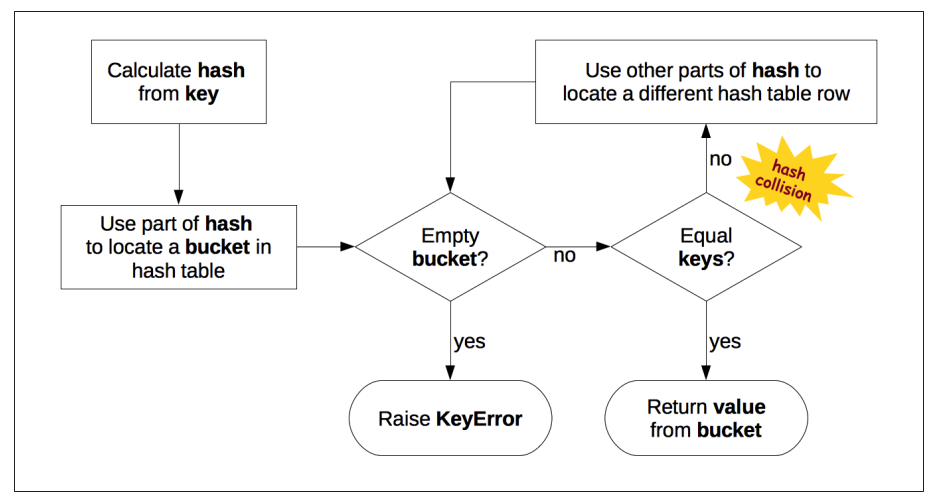

However, if search_key and found_key do not match, this is a hash collision. This hap‐
pens because a hash function maps arbitrary objects to a small number of bits, and —
in addition — the hash table is indexed with a subset of those bits. To resolve the colli‐
sion, the algorithm then takes different bits in the hash, massages them in a particular
way and uses the result as an offset to look up a different bucket 8 . If that is empty,
KeyError is raised; if not, either the keys match and the item value is returned, or the
collision resolution process is repeated. See Figure 3-3 for a diagram of this algorithm.

## Consequências práticas de como os dicionários funcionam

- Chaves precisam ser hashable
- Overhead de memória
- Busca por chaves é muito rápida
- Ordem das chaves depende da ordem de inserção

```python
DIAL_CODES = [
        (86, 'China'),
        (91, 'India'),
        (1, 'United States'),
        (62, 'Indonesia'),
        (55, 'Brazil'),
        (92, 'Pakistan'),
        (880, 'Bangladesh'),
        (234, 'Nigeria'),
        (7, 'Russia'),
        (81, 'Japan'),
    ]

d1 = dict(DIAL_CODES)  # <1>
print('d1:', d1.keys())
d2 = dict(sorted(DIAL_CODES))  # <2>
print('d2:', d2.keys())
d3 = dict(sorted(DIAL_CODES, key=lambda x:x[1]))  # <3>
print('d3:', d3.keys())
assert d1 == d2 and d2 == d3  # <4>
>>> d1: dict_keys([86, 91, 1, 62, 55, 92, 880, 234, 7, 81])
>>> d2: dict_keys([1, 7, 55, 62, 81, 86, 91, 92, 234, 880])
>>> d3: dict_keys([880, 55, 86, 91, 62, 81, 234, 92, 7, 1])
    
```

- Adicionar itens a um dicionário pode alterar a ordem das chaves